<a href="https://colab.research.google.com/github/purnaa-l/MiniProject-ML-Models/blob/main/Weather%20versus%20AQI/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("IndianWeatherRepository.csv")


In [3]:


# Select features and target
features = ['temperature_celsius', 'wind_kph', 'pressure_mb', 'humidity', 'cloud', 'uv_index']
target = 'air_quality_PM2.5'

# Drop rows with missing values in selected columns
df = df[features + [target]].dropna()

# Feature matrix and target vector
X = df[features]
y = df[target]

R² Score: 0.6390184722674341
RMSE: 27.14242912495125


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

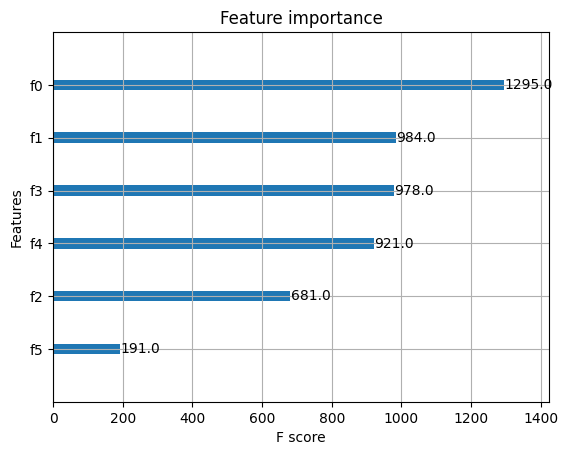

In [4]:


# Scale features (optional but good for some models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Initialize XGBoost Regressor model
model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)

# Optional: Feature importance
xgb.plot_importance(model)


In [5]:
feature_importance = model.feature_importances_
for feature, importance in zip(features, feature_importance):
    print(f"{feature}: {importance}")
#To find out the feature dependency on each of the models.

temperature_celsius: 0.10740910470485687
wind_kph: 0.16813968122005463
pressure_mb: 0.26383745670318604
humidity: 0.16214896738529205
cloud: 0.1344589740037918
uv_index: 0.1640058308839798
